# **1. Data Acquisation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load dataset
df=pd.read_csv('/content/question_difficulty_analysis_with_levels.csv')

In [6]:
#check first 5 rows
df.head()

,Question_ID,Average_Score,Time_Taken,Attempt_Rate,Difficulty_Level
0,Q001,48.09,38.49,0.68,Medium
1,Q002,91.30,201.83,0.18,Easy
2,Q003,74.90,114.88,0.25,Easy
3,Q004,64.90,167.31,0.91,Medium
4,Q005,31.70,275.04,0.65,Hard


In [7]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Question_ID       100 non-null    object 
 1   Average_Score     100 non-null    float64
 2   Time_Taken        100 non-null    float64
 3   Attempt_Rate      100 non-null    float64
 4   Difficulty_Level  100 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


In [8]:
#getting statistical description
df.describe()

,Average_Score,Time_Taken,Attempt_Rate
count,100.000000,100.000000,100.000000
mean,55.263800,164.414400,0.565600
std,22.311529,79.140115,0.264603
min,20.410000,31.880000,0.100000
25%,34.490000,95.337500,0.347500
50%,54.815000,166.515000,0.605000
75%,74.765000,236.872500,0.775000
max,94.020000,296.130000,0.990000


In [9]:
#check for null values
df.isnull().sum()

,0
Question_ID,0
Average_Score,0
Time_Taken,0
Attempt_Rate,0
Difficulty_Level,0


In [10]:
# unique values
df.apply(lambda x: len(x.unique()))

,0
Question_ID,100
Average_Score,99
Time_Taken,100
Attempt_Rate,65
Difficulty_Level,3


# **2. Data Wrangling**

In [11]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Average_Score', 'Time_Taken', 'Attempt_Rate']
Categorical Features: ['Question_ID', 'Difficulty_Level']


In [29]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_enco=LabelEncoder()

for col in categorical_features:
    encoded_features = label_enco.fit_transform(df[col])
#print updataed dataframe
df

,Question_ID,Average_Score,Time_Taken,Attempt_Rate,Difficulty_Level
0,0,48.09,38.49,0.68,2
1,1,91.30,201.83,0.18,0
2,2,74.90,114.88,0.25,0
3,3,64.90,167.31,0.91,2
4,4,31.70,275.04,0.65,1
...,...,...,...,...,...
95,95,57.03,124.29,0.57,2
96,96,59.20,226.01,0.79,2
97,97,52.07,272.22,0.29,2
98,98,21.91,269.51,0.66,1


## **(a) Distribution of Numerical Features**

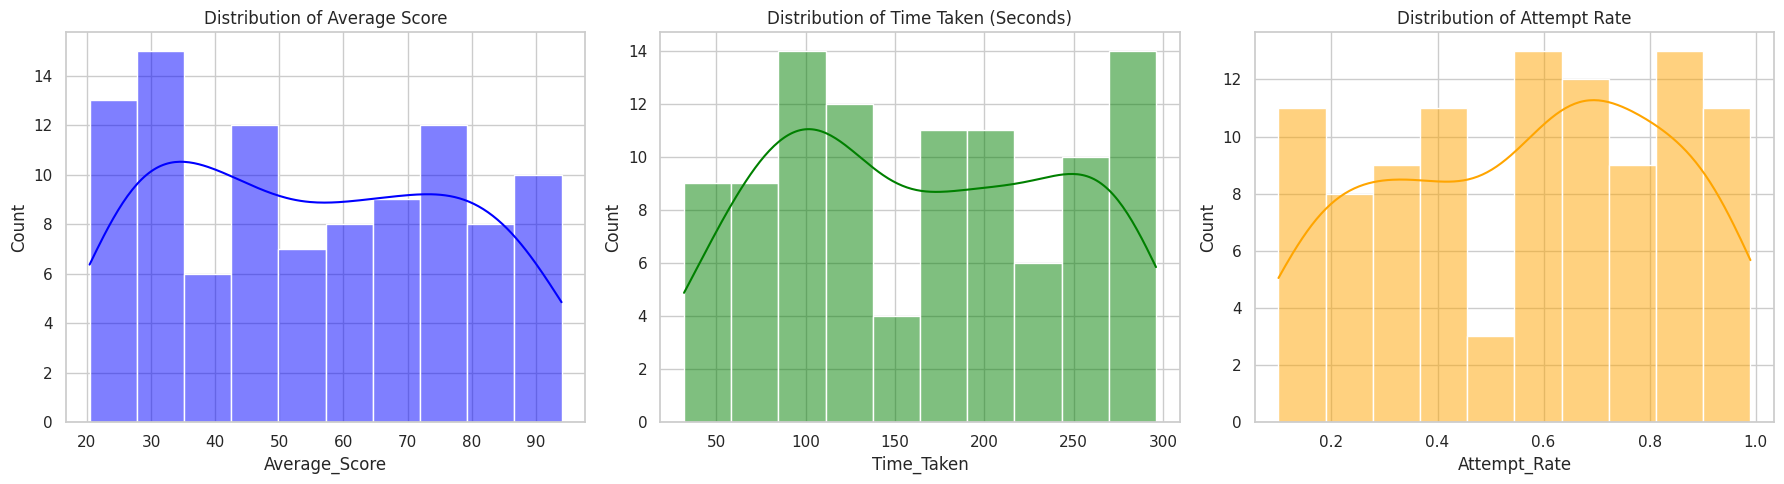

In [30]:
# Set a style for the plots
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Average_Score"], bins=10, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Average Score")

sns.histplot(df["Time_Taken"], bins=10, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Time Taken (Seconds)")

sns.histplot(df["Attempt_Rate"], bins=10, kde=True, ax=axes[2], color="orange")
axes[2].set_title("Distribution of Attempt Rate")

plt.tight_layout()
plt.show()

### Analysis of the Graph:

1. **Average Score**:
   - Most scores are between **30 and 50**.
   - Scores **below 30** and **above 70** are rare.

2. **Time Taken**:
   - The times are **evenly distributed**, with most records around **100-150 seconds**.

3. **Attempt Rate**:
   - The attempt rate is **evenly spread**, but most values fall between **0.4 and 0.7**.


# **3. Clustering for Difficulty Levels**

## **(a) Preprocess Data for Clustering**

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = df[["Average_Score", "Time_Taken", "Attempt_Rate"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## **(b) Apply K-Means Clustering**

In [34]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Map clusters to difficulty levels (manual labeling based on centroids)
cluster_map = {0: "Easy", 1: "Medium", 2: "Hard"}
df["Cluster_Level"] = df["Cluster"].map(cluster_map)

# Save the dataset with clusters
df.to_csv("question_difficulty_analysis_with_clusters.csv", index=False)


In [41]:
df["Cluster_Level"]

,Cluster_Level
0,Hard
1,Medium
2,Medium
3,Hard
4,Hard
...,...
95,Hard
96,Hard
97,Easy
98,Hard


## **(c) Visualize Clusters**

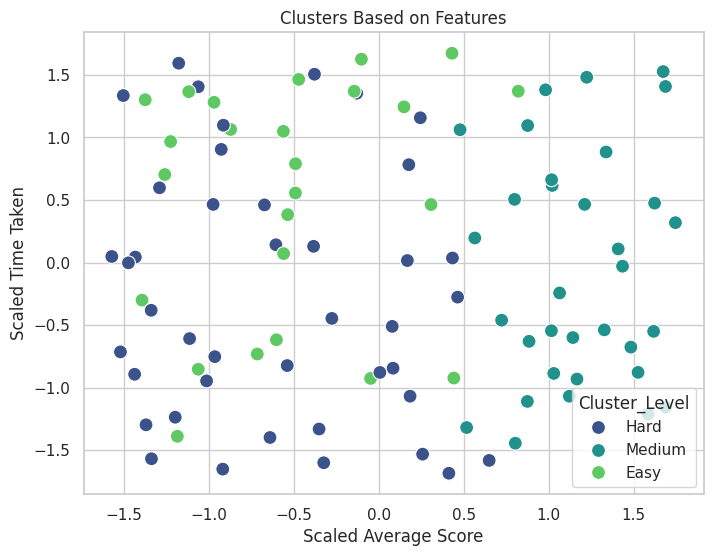

In [36]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=df["Cluster_Level"],
    palette="viridis",
    s=100
)
plt.title("Clusters Based on Features")
plt.xlabel("Scaled Average Score")
plt.ylabel("Scaled Time Taken")
plt.show()


### Interpretation:
- **Hard Tasks (Blue):**
  - Require more time and have varying scores, indicating they are challenging and inconsistent in performance.
- **Medium Tasks (Teal):**
  - Spread across moderate time and scores, suggesting balanced difficulty.
- **Easy Tasks (Green):**
  - Completed quickly with high scores, showing they are straightforward and efficient to handle.

### Recommendations:
1. **For Hard Tasks:**
   - Simplify these tasks or provide additional support/resources to improve scores and reduce time.
2. **For Medium Tasks:**
   - Identify areas for optimization to reduce time while maintaining scores.
3. **For Easy Tasks:**
   - Delegate or automate these tasks to save resources, as they are low-effort and high-performance.


In [37]:
# Display the dataset with clusters
print(df.head())

   Question_ID  Average_Score  Time_Taken  Attempt_Rate  Difficulty_Level  \
0            0          48.09       38.49          0.68                 2   
1            1          91.30      201.83          0.18                 0   
2            2          74.90      114.88          0.25                 0   
3            3          64.90      167.31          0.91                 2   
4            4          31.70      275.04          0.65                 1   

   Cluster Cluster_Level  
0        2          Hard  
1        1        Medium  
2        1        Medium  
3        2          Hard  
4        2          Hard  


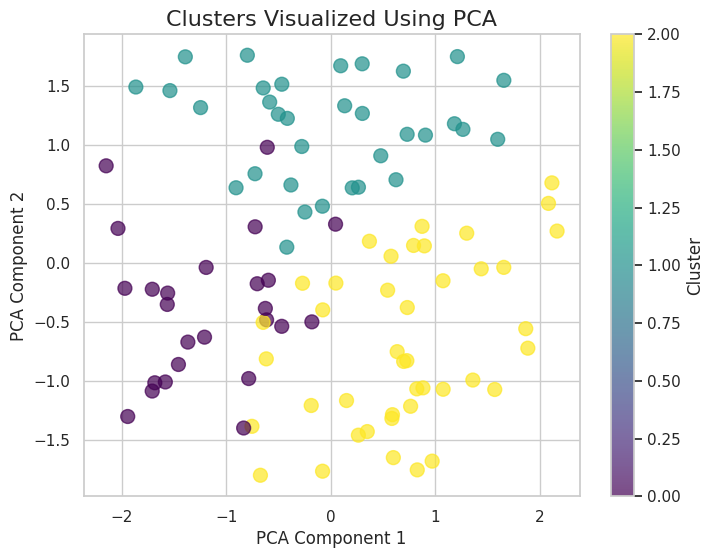

In [42]:
from sklearn.decomposition import PCA
#Apply PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

#Visualize the clusters in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)

#Adding labels and title
plt.title('Clusters Visualized Using PCA', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Show plot
plt.colorbar(label='Cluster')
plt.show()

#### Interpretation:
- **Cluster 0 (Purple):** Represents a group of points with shared features likely distinct in certain characteristics.
- **Cluster 1 (Teal):** Has a wider spread, suggesting moderate variability in its characteristics.
- **Cluster 2 (Yellow):** Appears clearly distinct, indicating well-defined differences from other clusters.

#### Recommendations:
1. **Cluster-Specific Insights:**
   - Examine the characteristics of each cluster to understand what differentiates them (e.g., features or patterns).
2. **Handle Overlaps:**
   - Investigate points in overlapping areas for possible misclassifications or transitional characteristics.
3. **Further Analysis:**
   - Consider visualizing higher PCA components or applying t-SNE/UMAP for nonlinear structures.